In [1]:
# KMeans Clustering for Crop Recommendation

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
# Map crop names to numeric labels
label_map = {
    "rice": 1, "maize": 2, "jute": 3, "cotton": 4, "coconut": 5, "papaya": 6, "orange": 7,
    "apple": 8, "muskmelon": 9, "watermelon": 10, "grapes": 11, "mango": 12, "banana": 13,
    "pomegranate": 14, "lentil": 15, "blackgram": 16, "mungbean": 17, "mothbeans": 18,
    "pigeonpeas": 19, "kidneybeans": 20, "chickpea": 21, "coffee": 22
}
df['label_encoded'] = df['label'].map(label_map)

In [6]:
# Separate features (X)
X = df.drop(['label', 'label_encoded'], axis=1)

In [7]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train the KMeans model
kmeans = KMeans(n_clusters=22, random_state=42)
kmeans.fit(X_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=22, random_state=42)

In [9]:
# Save the scaler and model
joblib.dump(scaler, 'minmax.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [10]:
# Output preview
print("KMeans model trained and saved successfully.")
print("First 10 predicted clusters:", kmeans.labels_[:10])

KMeans model trained and saved successfully.
First 10 predicted clusters: [ 3 15 15 15 15 15 15 15 15 15]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

<Axes: >

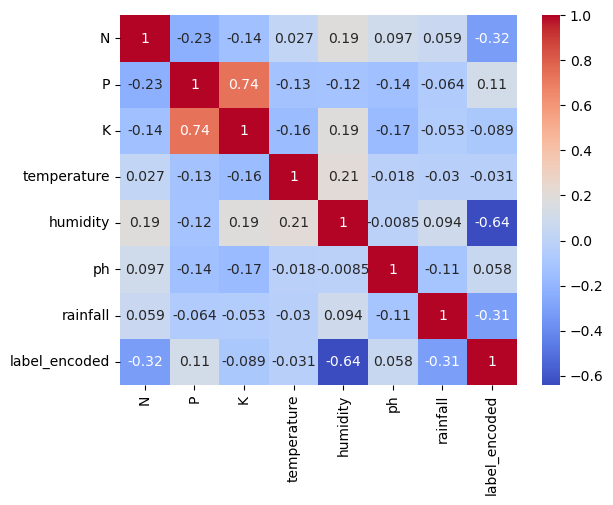

In [12]:
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap='coolwarm')

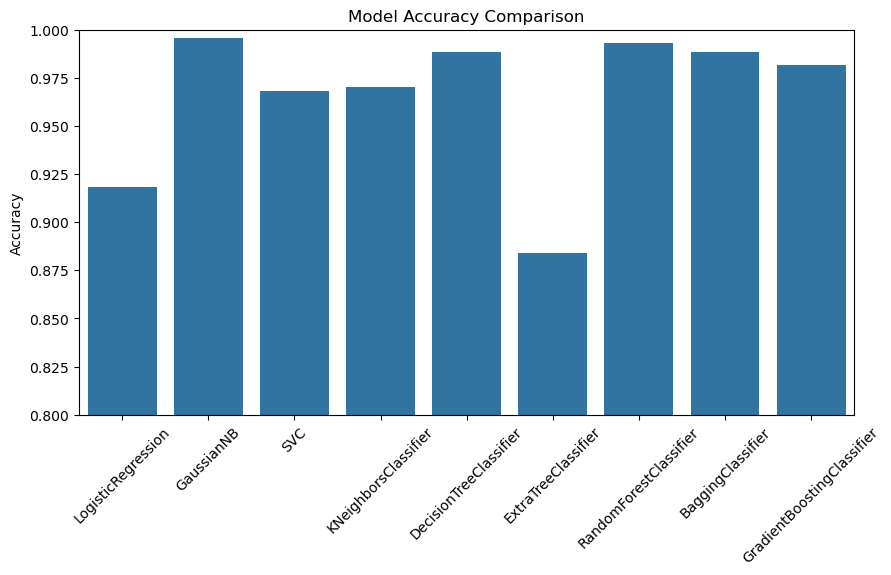

In [13]:
# Bar chart of model accuracy
model_scores = {
    'LogisticRegression' : 0.9181818181818182,
'GaussianNB' : 0.9954545454545455,
'SVC' : 0.9681818181818181,
'KNeighborsClassifier' : 0.9704545454545455,
'DecisionTreeClassifier' : 0.9886363636363636,
'ExtraTreeClassifier' : 0.884090909090909,
'RandomForestClassifier' : 0.9931818181818182,
'BaggingClassifier' : 0.9886363636363636,
'GradientBoostingClassifier' : 0.9818181818181818
}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()